 Weekly Average of People Staying at Home:
     Week  Population Staying at Home
0      0                1.205941e+05
1      1                1.511415e+05
2      2                1.494897e+05
3      3                1.468132e+05
4      4                1.467483e+05
5      5                1.450033e+05
6      6                1.435560e+05
7      7                1.469465e+05
8      8                1.391526e+05
9      9                1.389427e+05
10    10                1.393401e+05
11    11                1.541903e+05
12    12                1.568195e+05
13    13                1.589577e+05
14    14                1.590227e+05
15    15                1.605227e+05
16    16                1.552153e+05
17    17                1.547450e+05
18    18                1.545797e+05
19    19                1.489655e+05
20    20                1.422781e+05
21    21                1.498300e+05
22    22                1.483164e+05
23    23                8.641090e+04
24    24                8.72922

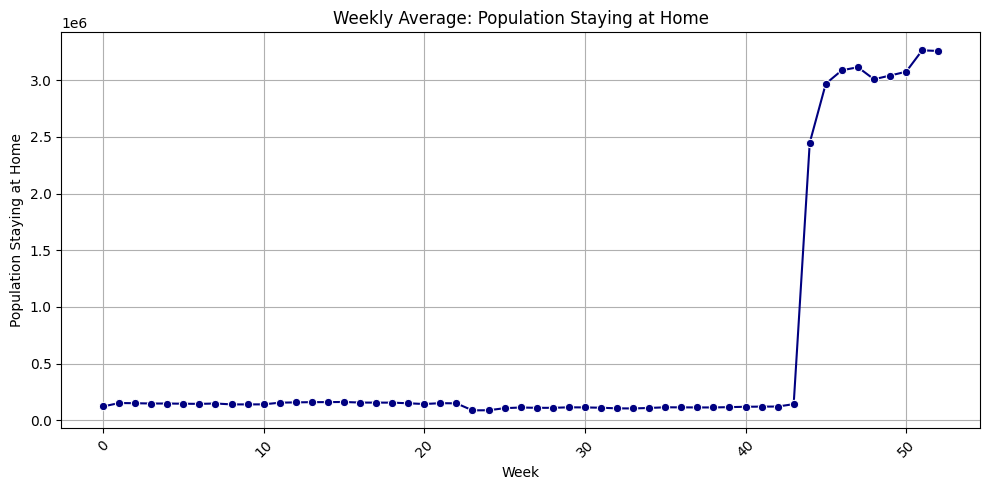

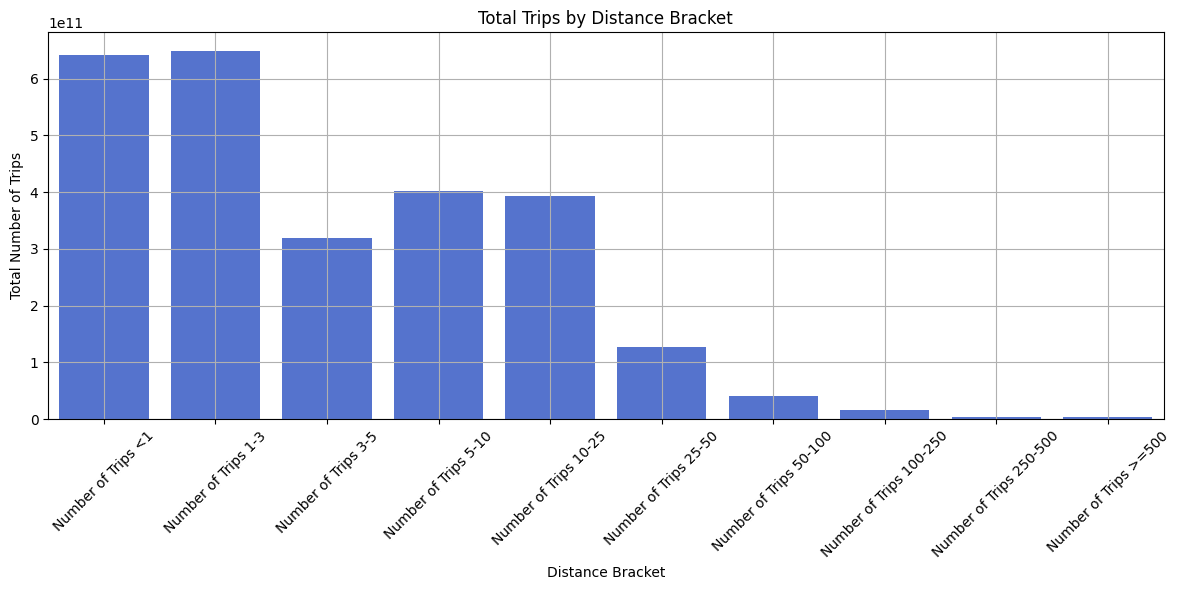

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
mobility_data = pd.read_csv("Trips_by_Distance (1).csv")
mobility_data.fillna(mobility_data.mean(numeric_only=True), inplace=True)

# Weekly home population trend
weekly_home_avg = mobility_data.groupby('Week')['Population Staying at Home'].mean().reset_index()

# Updated trip columns based on the actual dataset
trip_columns = [
    'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 
    'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 
    'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 
    'Number of Trips >=500'
]

# Midpoints for average travel distance calculation
distance_midpoints = [0.5, 2, 4, 7.5, 17.5, 37.5, 75, 175, 375, 500]

# Compute total number of trips per distance category
total_distance_trips = mobility_data[trip_columns].sum()

# Compute the number of active travelers
active_travelers = mobility_data['Population Not Staying at Home'].sum()

# Calculate the estimated average travel distance
average_distance = (total_distance_trips * distance_midpoints).sum() / active_travelers

# Print outputs
print(" Weekly Average of People Staying at Home:\n", weekly_home_avg)
print(f" Estimated Average Distance Travelled: {round(average_distance, 2)} miles")

# --- Plot 1: Weekly Trend of Staying Home ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_home_avg, x='Week', y='Population Staying at Home', marker="o", color='navy')
plt.title('Weekly Average: Population Staying at Home')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("weekly_stay_home.png")
plt.show() 

# --- Plot 2: Total Trips by Distance Bracket ---
plt.figure(figsize=(12, 6))
sns.barplot(x=total_distance_trips.index, y=total_distance_trips.values, color='royalblue')
plt.title('Total Trips by Distance Bracket')
plt.xlabel('Distance Bracket')
plt.ylabel('Total Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("total_trips_by_distance.png")
plt.show()


In [5]:
# Filter large trips from original dataset
ten_twentyfive_tripdays = mobility_data[mobility_data['Number of Trips 10-25'] > 10_000_000]
fifty_hundred_tripdays = mobility_data[mobility_data['Number of Trips 50-100'] > 10_000_000]

# Convert to date sets
dates_10_25 = set(ten_twentyfive_tripdays['Date'])
dates_50_100 = set(fifty_hundred_tripdays['Date'])

# Compare dates
overlapping_days = sorted(list(dates_10_25 & dates_50_100))  # Days where both conditions are true
just_10_25 = sorted(list(dates_10_25 - dates_50_100))  # Days where only 10-25 condition is true
just_50_100 = sorted(list(dates_50_100 - dates_10_25))  # Days where only 50-100 condition is true

# Output the results
print(f" Days with >10M (10–25 miles): {len(dates_10_25)}")
print(f" Days with >10M (50–100 miles): {len(dates_50_100)}")
print(f" Overlapping days: {len(overlapping_days)}")

# Print shared high-trip days (overlapping days)
print("\n Shared High-Trip Days (where both > 10M people in both trip categories):")
for date in overlapping_days:
    print(date)

# Optionally, print the other sets of days
print("\n Only >10M (10–25 miles) days:")
for date in just_10_25:
    print(date)

print("\n Only >10M (50–100 miles) days:")
for date in just_50_100:
    print(date)         

 Days with >10M (10–25 miles): 901
 Days with >10M (50–100 miles): 900
 Overlapping days: 900

 Shared High-Trip Days (where both > 10M people in both trip categories):
1/1/2019
1/1/2020
1/1/2021
1/10/2019
1/10/2020
1/10/2021
1/11/2019
1/11/2020
1/11/2021
1/12/2019
1/12/2020
1/12/2021
1/13/2019
1/13/2020
1/13/2021
1/14/2019
1/14/2020
1/14/2021
1/15/2019
1/15/2020
1/15/2021
1/16/2019
1/16/2020
1/16/2021
1/17/2019
1/17/2020
1/17/2021
1/18/2019
1/18/2020
1/18/2021
1/19/2019
1/19/2020
1/19/2021
1/2/2019
1/2/2020
1/2/2021
1/20/2019
1/20/2020
1/20/2021
1/21/2019
1/21/2020
1/21/2021
1/22/2019
1/22/2020
1/22/2021
1/23/2019
1/23/2020
1/23/2021
1/24/2019
1/24/2020
1/24/2021
1/25/2019
1/25/2020
1/25/2021
1/26/2019
1/26/2020
1/26/2021
1/27/2019
1/27/2020
1/27/2021
1/28/2019
1/28/2020
1/28/2021
1/29/2019
1/29/2020
1/29/2021
1/3/2019
1/3/2020
1/3/2021
1/30/2019
1/30/2020
1/30/2021
1/31/2019
1/31/2020
1/31/2021
1/4/2019
1/4/2020
1/4/2021
1/5/2019
1/5/2020
1/5/2021
1/6/2019
1/6/2020
1/6/2021
1/7/2019


In [6]:
import dask.dataframe as dd
from dask.distributed import Client
import time

# Load the dataset
trip_data_dask = dd.read_csv("Trips_Full Data (2).csv", assume_missing=True)

# Strip any extra spaces from column names (optional)
trip_data_dask.columns = trip_data_dask.columns.str.strip()

# Check if the 'Week of Date' column exists
print(trip_data_dask.columns)

def run_parallel_analysis(workers=10):
    client = Client(n_workers=workers, threads_per_worker=1)
    print(f" Dask client initialized with {workers} workers")

    start_time = time.time()
    # Update to use the correct column 'Week of Date'
    avg_trips = trip_data_dask.groupby("Week of Date")["Trips 1-25 Miles"].mean().compute()
    elapsed = round(time.time() - start_time, 2)

    client.shutdown()
    return elapsed, avg_trips

# Run tests with both configurations
time_10_workers, _ = run_parallel_analysis(workers=10)
time_20_workers, _ = run_parallel_analysis(workers=20)

print(f" Time with 10 workers: {time_10_workers} sec")
print(f" Time with 20 workers: {time_20_workers} sec")

    

Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')
 Dask client initialized with 10 workers
 Dask client initialized with 20 workers
 Time with 10 workers: 2.37 sec
 Time with 20 workers: 2.06 sec


 Model R² Accuracy: 0.993


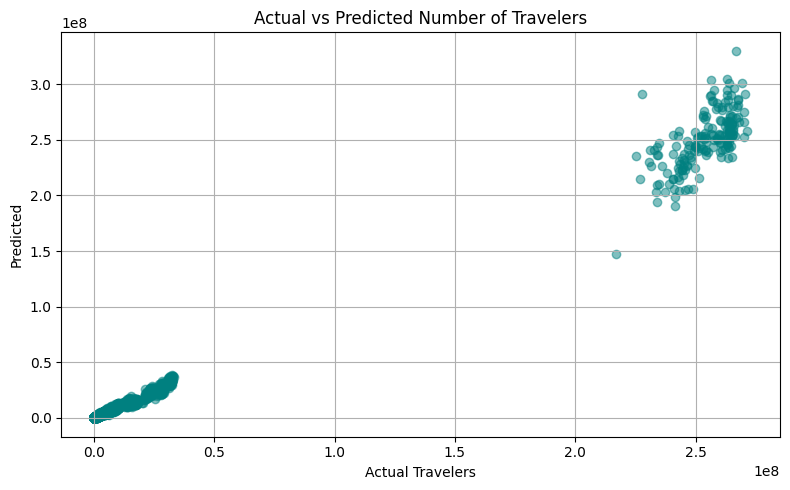

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and label
X_features = mobility_data[trip_columns]
y_target = mobility_data['Population Not Staying at Home']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Model training
travel_model = LinearRegression()
travel_model.fit(X_train, y_train)

# Accuracy
model_score = travel_model.score(X_test, y_test)
print(f" Model R² Accuracy: {round(model_score, 3)}")

# Visualization
predicted = travel_model.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predicted, alpha=0.5, color="teal")
plt.title("Actual vs Predicted Number of Travelers")
plt.xlabel("Actual Travelers")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.savefig("travel_model_accuracy.png")
plt.show()


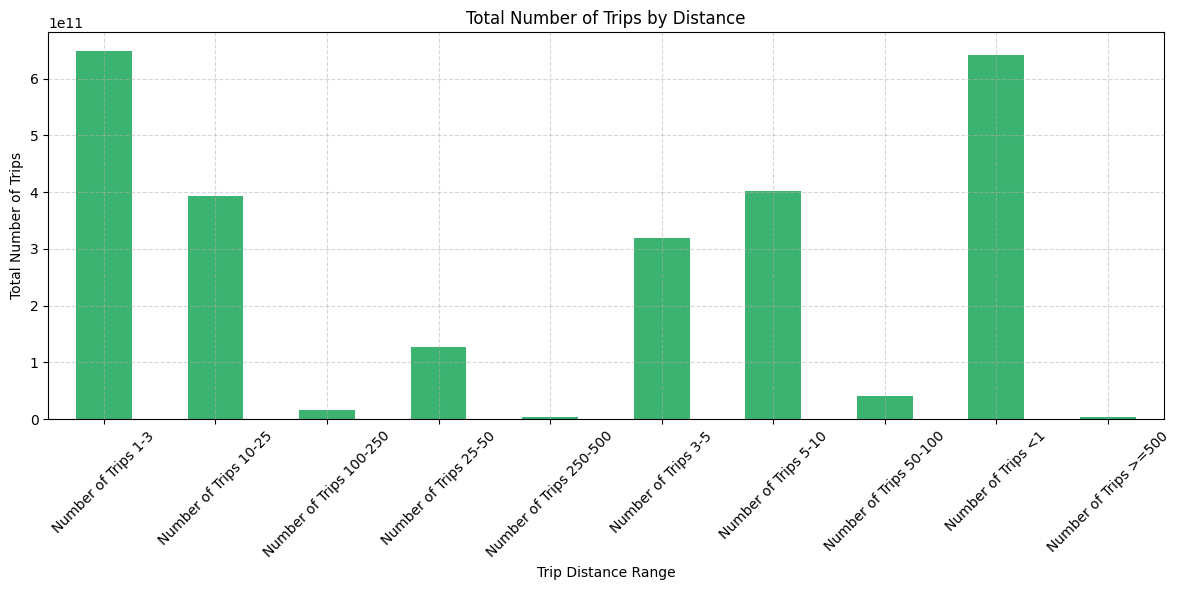

In [27]:
import matplotlib.pyplot as plt

trip_distance_cols = [
    'Number of Trips <1',
    'Number of Trips 1-3',
    'Number of Trips 3-5',
    'Number of Trips 5-10',
    'Number of Trips 10-25',
    'Number of Trips 25-50',
    'Number of Trips 50-100',
    'Number of Trips 100-250',
    'Number of Trips 250-500',
    'Number of Trips >=500'
]

# columns are in the DataFrame
available_cols = [col for col in trip_distance_cols if col in mobility_data.columns]

# Only plot if data exists
if available_cols:
    total_trips_by_distance = mobility_data[available_cols].sum().sort_index()

    plt.figure(figsize=(12, 6))
    total_trips_by_distance.plot(kind='bar', color='mediumseagreen')
    plt.title("Total Number of Trips by Distance")
    plt.xlabel("Trip Distance Range")
    plt.ylabel("Total Number of Trips")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
